# Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('statistics_sales_project_data.csv')
df.head()

,date,store_type,region,marketing_campaign,units_sold,revenue
0,2023-01-01,Online,Western,Yes,6,11876.03
1,2023-01-02,Physical,Rift Valley,Yes,8,14333.00
2,2023-01-03,Physical,Western,No,4,8101.97
3,2023-01-04,Physical,Coast,No,8,10928.92
4,2023-01-05,Online,Nairobi,No,9,18166.40


# PART 1: Descriptive Statistics 
### Task 1.1 – Central Tendency


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1200 non-null   object 
 1   store_type          1200 non-null   object 
 2   region              1200 non-null   object 
 3   marketing_campaign  1200 non-null   object 
 4   units_sold          1200 non-null   int64  
 5   revenue             1200 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 56.4+ KB


In [44]:
# Monthly revenue

df['date'] = pd.to_datetime(df['date'])
df['month_year'] = df['date'].dt.strftime('%b - %Y')
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

monthly_revenue = df.groupby(['month_year'])['revenue'].sum()
monthly_revenue.head()

month_year
Apr - 2023    206097.41
Apr - 2024    213436.47
Apr - 2025    252523.15
Apr - 2026    105774.81
Aug - 2023    266419.83
Name: revenue, dtype: float64

In [4]:
df.columns

Index(['date', 'store_type', 'region', 'marketing_campaign', 'units_sold',
       'revenue', 'month_year'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1200 non-null   datetime64[ns]
 1   store_type          1200 non-null   object        
 2   region              1200 non-null   object        
 3   marketing_campaign  1200 non-null   object        
 4   units_sold          1200 non-null   int64         
 5   revenue             1200 non-null   float64       
 6   month_year          1200 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 65.8+ KB


In [6]:
# Mean, median, mode

monthly_revenue_mean = print(f'Mean -', monthly_revenue.mean())
monthly_revenue_median = print(f'Median -', monthly_revenue.median())
monthly_revenue_mode = print(f'Mode -', monthly_revenue.mode().iloc[0])

Mean - 248159.22000000003
Median - 250308.555
Mode - 105774.81


### - Explain which measure best represents revenue and why (consider outliers)

-  The median best represents revenue because it is not sensitive to occasional spikes in revenue for example during holidays, ending of seasons or marketing campaigns  as in the case of means. 

# Task 1.2 - Dispersion


In [ ]:
## Range, Variance and Standard Deviation calculation
monthly_revenue_range = print(f'Range -', monthly_revenue.max()- monthly_revenue.min())
monthly_revenue_variance = print(f'Variance -', monthly_revenue.var())
monthly_revenue_standardDeviation = print(f'Standard Deviation -', monthly_revenue.std())

Range - 198603.55
Variance - 1199955651.5289953
Standard Deviation - 34640.37603042142


### - What does high standard deviation imply about sales stability?

- Implys that sales are less predictable and vary a lot from month to month

# Task 1.3 - Shape of Distribution


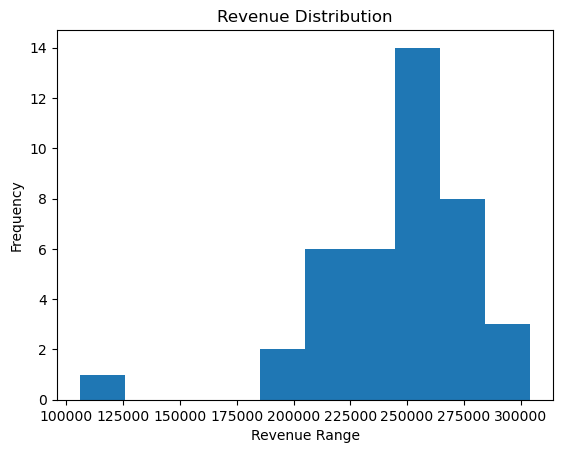

In [ ]:
# Histogram of revenue
plt.hist(monthly_revenue)
plt.xlabel("Revenue Range")
plt.ylabel("Frequency")
plt.title("Revenue Distribution")


### - A comment on skewness and kurtosis

- The revenue histogram shows a positively skewed distribution, where most monthly revenue values are moderate, and a few high revenue months create a right tail.

- Also identified is a high kurtosis suggesting presence of outlier months with unusually high revenue'

In [33]:
print(monthly_revenue.max())
print(monthly_revenue.min())
print(monthly_revenue.median())

304378.36
105774.81
250308.555


# Part 2: Data Visualization

In [43]:
df.columns

Index(['date', 'store_type', 'region', 'marketing_campaign', 'units_sold',
       'revenue', 'month_year'],
      dtype='object')

Text(0, 0.5, 'Revenue')

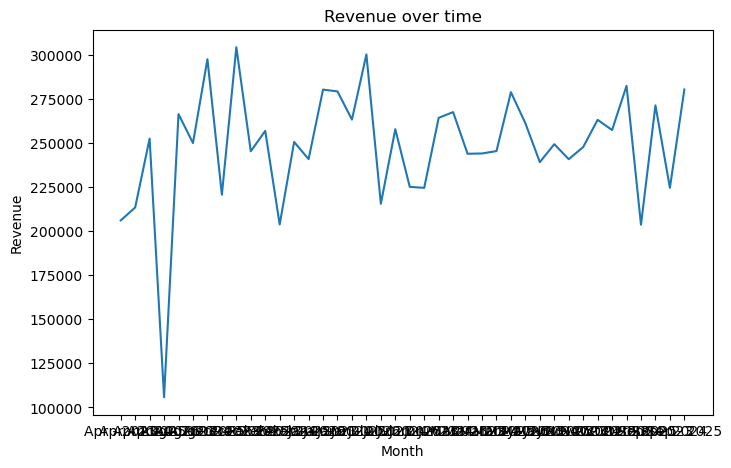

In [ ]:
# Line chart - Revenue over time

plt.figure(figsize=(8,5))
plt.subplotplot(monthly_revenue.index, monthly_revenue.values)
plt.title('Revenue over time')
plt.xlabel('Month')
plt.ylabel('Revenue')

[Text(0, 0, '4.63743e+06'), Text(0, 0, '5.28894e+06')]

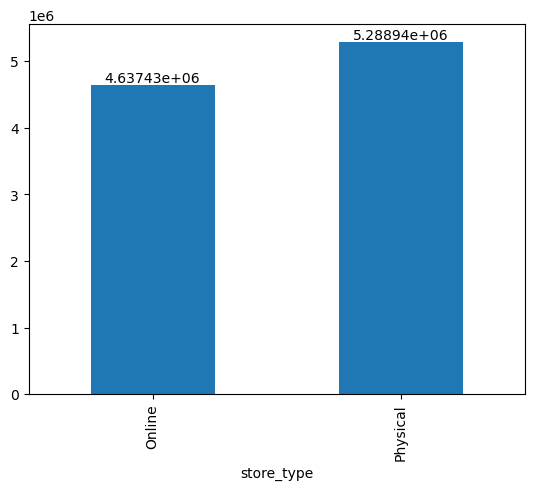

<Figure size 600x400 with 0 Axes>

In [11]:
# Bar chart Revenue by store type
ax = revenue_by_storetype = df.groupby(['store_type'])['revenue'].sum().plot(kind='bar')
plt.figure(figsize=(6,4))
ax.bar_label(ax.containers[0])

 



In [12]:
revenue_by_storetype

<Axes: xlabel='store_type'>

In [36]:
# Box plot - Revenue distribution by region
revenue_by_region = df.groupby(['region'])['revenue'].sum().reset_index()
revenue_by_region

,region,revenue
0,Central,2186660.52
1,Coast,1693296.13
2,Nairobi,1849335.21
3,Rift Valley,2221299.69
4,Western,1975777.25


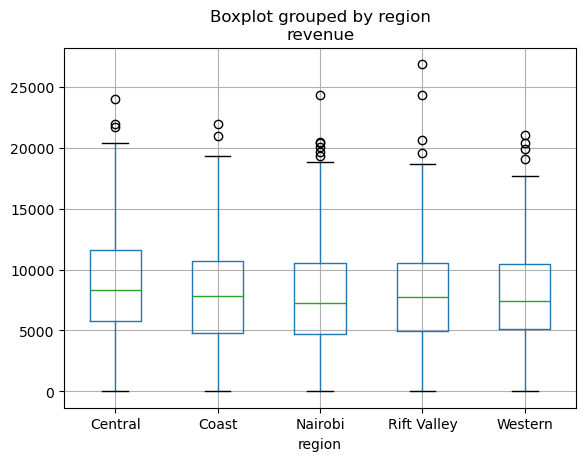

In [ ]:
df.boxplot(column="revenue", by="region")
plt.show()

In [15]:
df.columns

Index(['date', 'store_type', 'region', 'marketing_campaign', 'units_sold',
       'revenue', 'month_year'],
      dtype='object')

Text(0, 0.5, 'Revenue (KES)')

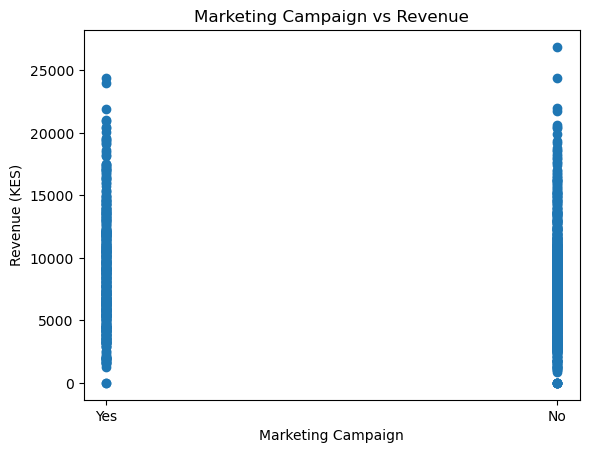

In [42]:
# Scatter plot - Marketing spend vs revenue
plt.scatter(df['marketing_campaign'], df['revenue'])
plt.title("Marketing Campaign vs Revenue")
plt.xlabel("Marketing Campaign")
plt.ylabel("Revenue (KES)")

In [17]:
df.head()

,date,store_type,region,marketing_campaign,units_sold,revenue,month_year
0,2023-01-01,Online,Western,Yes,6,11876.03,Jan - 2023
1,2023-01-02,Physical,Rift Valley,Yes,8,14333.00,Jan - 2023
2,2023-01-03,Physical,Western,No,4,8101.97,Jan - 2023
3,2023-01-04,Physical,Coast,No,8,10928.92,Jan - 2023
4,2023-01-05,Online,Nairobi,No,9,18166.40,Jan - 2023


# Part 3: Sampling and Bias
### Task 3.1 - Population vs Sample

- Population - This is the entire set of data or observations that the study aims to understand and make conclusions

- Sample - This is a subset of the population that is actually collected and used in a project

* In this project, the population is the entire revenue data plus all othe rstore activities the company could analyse across all the years the company has been in operation while the sample is the 3 year revenue data that we have for analysis.


### Task 3.2 - Sampling bias
- Assumption: Only urban stores were sampled - Selection of urban stores is not a representation of all store types in the population. This could affect conclusions and suggest that revenue is higher than it truly is.

- Better sampling method would be random sampling to ensure every type of store is represented therefore reducing bias and improving accuracy of results

# Part 4: Law of Large Numbers and CLT
### Task 4.1 - Law of Large Numbers

In [18]:
import numpy as np

In [19]:
data = df['revenue'].values
sample_sizes = [10,50,100,500]
sample_means = []
for n in sample_sizes:
    sample = np.random.choice(data, size=n, replace=True)
    sample_means.append(np.mean(sample))


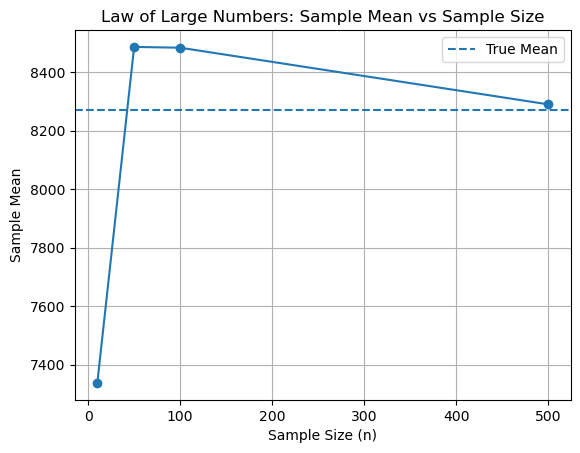

In [20]:
# plot
plt.plot(sample_sizes, sample_means, marker='o')
plt.axhline(np.mean(data), linestyle='--', label='True Mean')

plt.xlabel("Sample Size (n)")
plt.ylabel("Sample Mean")
plt.title("Law of Large Numbers: Sample Mean vs Sample Size")
plt.legend()
plt.grid(True)

- Convergence behaviour - As sample size increases, the sample mean becomes stable and moves closer to the true population mean

### Task 4.2. - Central Limit Theorem

In [21]:
sample_means_2 = []
n=30
num_samples = 200
for i in range (num_samples):
    sample = np.random.choice(data, size=n,replace=True)
    sample_means_2.append(np.mean(sample))

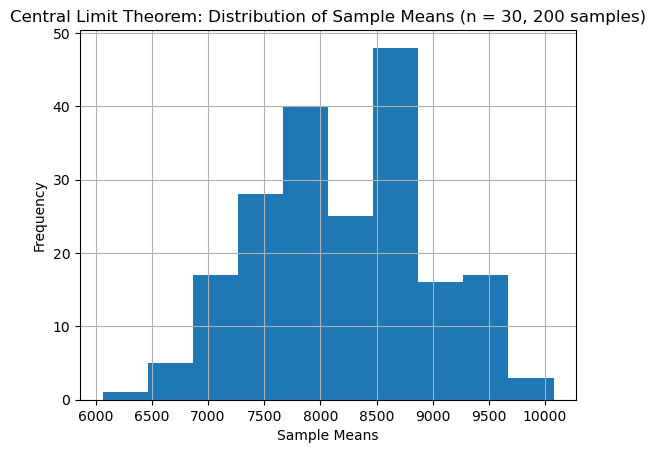

In [22]:
# Plot
plt.hist(sample_means_2)
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.title("Central Limit Theorem: Distribution of Sample Means (n = 30, 200 samples)")
plt.grid(True)
plt.show()

# Part 5: Hypothesis Testing

### Business question:
- Does running a marketing campaign increase average revenue per transaction?

### Task 5.1 - Hypotheses
- H₀: Mean revenue (campaign) = Mean revenue (no campaign)
- H₁: Mean revenue (campaign) > Mean revenue (no campaign)

### Task 5.2-Statistical Test

In [23]:
df.head()

,date,store_type,region,marketing_campaign,units_sold,revenue,month_year
0,2023-01-01,Online,Western,Yes,6,11876.03,Jan - 2023
1,2023-01-02,Physical,Rift Valley,Yes,8,14333.00,Jan - 2023
2,2023-01-03,Physical,Western,No,4,8101.97,Jan - 2023
3,2023-01-04,Physical,Coast,No,8,10928.92,Jan - 2023
4,2023-01-05,Online,Nairobi,No,9,18166.40,Jan - 2023


In [24]:
from scipy.stats import ttest_ind

In [25]:
# t-test
sales_with_marketing = df[df['marketing_campaign']== 'Yes']['revenue']
sales_with__no_marketing = df[df['marketing_campaign']== 'No']['revenue']



In [26]:
# Perform the t-test
t_stat, p_value = ttest_ind(sales_with_marketing, sales_with__no_marketing, equal_var=False) 
print("Test Statistic:", t_stat)
print("P-value:", p_value)

Test Statistic: 4.335719425186804
P-value: 1.622302026731134e-05


In [27]:
# Decision
alpha = 0.05

if p_value < alpha:
    print("Reject H₀: There IS a significant difference.")
else:
    print("Fail to reject H₀: No significant difference found.")

Reject H₀: There IS a significant difference.


# Part 6: Errors and Interpretation
### Task 6.1 - Errors
- Type I Error - You reject the null hypothesis when it is actually true. In this case, you conclude that the marketing campaign increases revenue when in reality it does not. Therefore the company beleives the is effective, spends money on ads that do not work potentially losing a lot of money.

- Type II Error - You fail to reject the null hypothesis when it is false. In this case, you conclude that the campaign does not increase revenue when in reality it does. Therefore the company misses out on a profitable marketing strategy, losing potential sales and falling behinnd competitors who advertise moree effectively.

# Part 7: Effect of Size and Power
### Task 7.1 - Effect Size

In [28]:
mean_yes = sales_with_marketing.mean()
mean_no = sales_with__no_marketing.mean()
std_pooled = np.sqrt(((sales_with_marketing.std()**2)+ (sales_with__no_marketing.std()**2))/2)

# cohens_d
cohens_d = (mean_yes - mean_no)/std_pooled
cohens_d

0.2617714911531112

# Task 7.2 - Power Discussion
### - Why might a statistically insignificant result still matter? 
- Sample size might be too small contributing to low statistical power and leading to high chances of type II error and failing to detect an effect that actually exists and is significant. Moreover, small effects can still be important especially when it is revenue based. A small increase per transaction can add up to large revenues. 

### - Should the company collect more data? 
- Yes. Large samples increase statistical power and reduces the risk of type II error. In this case, marketing impact may require longer time frames that take into account seasonal effects and long-term buying patterns. A small non-significant effect may become significant with a larger sample.